In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_excel('/Users/jon/dat11syd/lessons/lesson-04/lab/car_mpg.xlsx')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Origin,model
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""


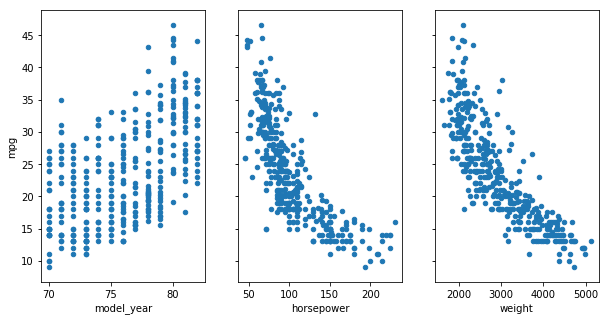

In [3]:
data.shape# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='model_year', y='mpg', ax=axs[0], figsize=(10, 5))
data.plot(kind='scatter', x='horsepower', y='mpg', ax=axs[1])
data.plot(kind='scatter', x='weight', y='mpg', ax=axs[2])



In [30]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='mpg ~  weight', data=data).fit()

# print the coefficients
lm.params

Intercept    46.216525
weight       -0.007647
dtype: float64

In [31]:
data = data.dropna(how='any') 

In [32]:
# manually calculate the prediction
39.955805 - 0.157591*75

28.13648

In [33]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'weight': [1790]})
X_new.head()

,weight
0,1790


In [34]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    32.527781
dtype: float64

In [35]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'weight': [data.weight.min(), data.weight.max()]})
X_new.head()

,weight
0,1613
1,5140


In [36]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    33.881361
1     6.909184
dtype: float64

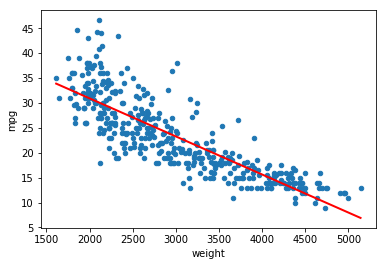

In [38]:
# first, plot the observed data
data.plot(kind='scatter', x='weight', y='mpg')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [39]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,44.646282,47.786767
weight,-0.008155,-0.007140


In [40]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
Origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [41]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.623069e-193
weight       6.015296e-102
dtype: float64

In [42]:
# print the R-squared value for the model
lm.rsquared

0.6926304331206254

In [43]:

# create a fitted model with all three features
lm = smf.ols(formula='mpg ~ horsepower + weight + cylinders + model_year', data=data).fit()

# print the coefficients
lm.params

Intercept    -13.523278
horsepower    -0.003615
weight        -0.006275
cylinders     -0.127687
model_year     0.746632
dtype: float64

In [44]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     408.4
Date:                Thu, 03 May 2018   Prob (F-statistic):          2.07e-137
Time:                        11:27:49   Log-Likelihood:                -1037.3
No. Observations:                 392   AIC:                             2085.
Df Residuals:                     387   BIC:                             2104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5233      4.202     -3.218      0.001     -21.785      -5.261
horsepower    -0.0036      0.010     -0.369      0.713      -0.023       0.016
weight        -0.0063      0.001    -11.944      0.000      -0.007      -0.005
cylinders     -0.1277      0.243     -0.526      0.599      -0.605       0.350
model_year     0.7466      0.052     14.271      0.000       0.644       0.849
==============================================================================
Omnibus:                       42.785   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.835
Skew:                           0.677   Prob(JB):                     2.52e-16
Kurtosis:                       4.601   Cond. No.                     7.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# only include TV and Radio in the model
lm = smf.ols(formula='mpg ~  cylinders', data=data).fit()
lm.rsquared

0.6046889889441247

In [46]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='mpg ~ cylinders + weight', data=data).fit()
lm.rsquared

0.6974634997521982

In [47]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='mpg ~ horsepower + weight', data=data).fit()
lm.rsquared

0.7063752737298348

In [49]:
# create X and y
feature_cols = ['horsepower','weight', 'cylinders', 'Origin', 'model_year']
X = data[feature_cols]
y = data.mpg

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-16.95589336595022
[-0.01116112 -0.0056497   0.05357429  1.19905851  0.73976131]


In [50]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('horsepower', -0.011161120864329535),
 ('weight', -0.005649701736060168),
 ('cylinders', 0.05357428986391405),
 ('Origin', 1.1990585100420248),
 ('model_year', 0.739761305485376)]

In [51]:
# predict for a new observation


In [52]:
# calculate the R-squared
lm.score(X, y)

0.8180803556952406